# Prediction using supervised ML

Simple Linear Regression
In this regression task we will predict the the percentage of marks the student is expected to score based on the number of study hours 


# IMPORT LIBRARIES

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORT THE DATA

In [37]:
df=pd.read_csv('student_scores - student_scores.csv')


In [38]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# VISUALISATION

Text(0.5, 1.0, 'Number of hours studied vs marks scored')

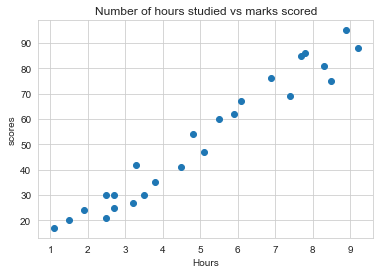

In [41]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('scores')
plt.title('Number of hours studied vs marks scored')

The above graph shows that the hours studied and marks scored has a linear relation

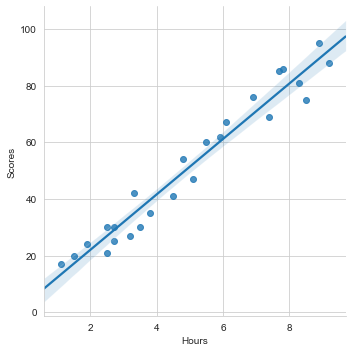

In [42]:
sns.set_style('whitegrid')
sns.lmplot('Hours','Scores',df)

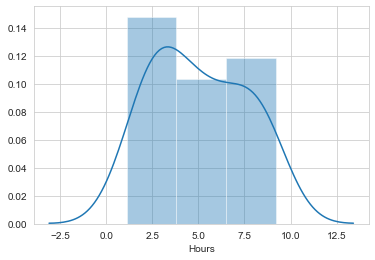

In [43]:
sns.distplot(df['Hours'])

# Training a Linear Regression Model

# X and y arrays

In [44]:
X=df['Hours'].values.reshape(-1,1)
Y=df['Scores'].values.reshape(-1,1)


# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=26)

# Creating and Training the Model

In [57]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# PREDICTION

In [70]:
Y_pred=lm.predict(X_test)
output=lm.predict([[9.25]])
output


array([[91.53356501]])

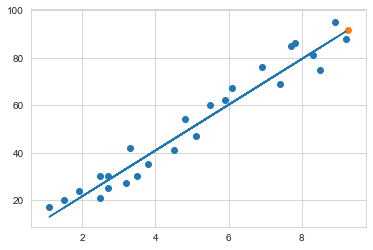

In [67]:
plt.plot(df['Hours'].values.reshape(-1,1),lm.predict(df['Hours'].values.reshape(-1,1)))
plt.scatter(df['Hours'],df['Scores'])
plt.scatter(9.25,output)

In [73]:
np.concatenate([Y_test,Y_pred],axis=1)

array([[41.        , 45.68935151],
       [17.        , 12.87454606],
       [62.        , 59.20133023],
       [81.        , 82.36472231],
       [95.        , 88.15557034],
       [85.        , 76.57387429],
       [24.        , 20.59567675],
       [30.        , 28.31680745]])

# REGRESSION EVALUATION METRICS

In [71]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 4.167033588293981
MSE: 22.62159663602797
RMSE: 4.756216630477208
